In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.tree import export_text
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

from xgboost import XGBClassifier
import xgboost as xgb

from IPython.display import display

In [2]:
df = pd.read_csv("fetal_health.csv")

In [3]:
df

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


In [4]:
df['fetal_health'] = df['fetal_health'].astype(int)
display(df.fetal_health)
print(50 * "-")
display(df.fetal_health.value_counts())

0       2
1       1
2       1
3       1
4       1
       ..
2121    2
2122    2
2123    2
2124    2
2125    1
Name: fetal_health, Length: 2126, dtype: int64

--------------------------------------------------


fetal_health
1    1655
2     295
3     176
Name: count, dtype: int64

In [5]:
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=1) #stratify=df['fetal_health'] does not work and makes the result even worse
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=1) 

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.fetal_health.values
y_val = df_val.fetal_health.values
y_test = df_test.fetal_health.values

del df_train['fetal_health']
del df_val['fetal_health']
del df_test['fetal_health']

In [6]:
len(df_train), len(df_val), len(df_test)

(1275, 425, 426)

In [7]:
print('Shape of y_train:', y_train.shape)
print('Shape of y_val:', y_val.shape)

Shape of y_train: (1275,)
Shape of y_val: (425,)


In [8]:
y_train

array([1, 1, 1, ..., 1, 1, 1])

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 21 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          1275 non-null   float64
 1   accelerations                                           1275 non-null   float64
 2   fetal_movement                                          1275 non-null   float64
 3   uterine_contractions                                    1275 non-null   float64
 4   light_decelerations                                     1275 non-null   float64
 5   severe_decelerations                                    1275 non-null   float64
 6   prolongued_decelerations                                1275 non-null   float64
 7   abnormal_short_term_variability                         1275 non-null   float64
 8   mean_value_of_short_term_variability  

In [10]:
train_dict = df_train.to_dict(orient='records')
train_dict[0]

{'baseline value': 125.0,
 'accelerations': 0.0,
 'fetal_movement': 0.0,
 'uterine_contractions': 0.004,
 'light_decelerations': 0.0,
 'severe_decelerations': 0.0,
 'prolongued_decelerations': 0.0,
 'abnormal_short_term_variability': 38.0,
 'mean_value_of_short_term_variability': 0.8,
 'percentage_of_time_with_abnormal_long_term_variability': 11.0,
 'mean_value_of_long_term_variability': 9.0,
 'histogram_width': 35.0,
 'histogram_min': 103.0,
 'histogram_max': 138.0,
 'histogram_number_of_peaks': 2.0,
 'histogram_number_of_zeroes': 0.0,
 'histogram_mode': 131.0,
 'histogram_mean': 129.0,
 'histogram_median': 131.0,
 'histogram_variance': 1.0,
 'histogram_tendency': 1.0}

**The dataset is all numerical, no need for encoding ie. Dict Vectorizer or Label Encoder**

In [11]:
df_train.isna().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [12]:
X_train = df_train
X_val = df_val
X_test = df_test

**The dataset is imbalanced so we will have to adjust the weight so as not to give favor to the dominating value**

In [13]:
y_train_distribution = pd.Series(y_train).value_counts(normalize=True) * 100
print(y_train_distribution)

1    78.431373
2    13.254902
3     8.313725
Name: proportion, dtype: float64


In [14]:
y_val_distribution = pd.Series(y_val).value_counts(normalize=True) * 100
print(y_val_distribution)

1    77.411765
2    13.647059
3     8.941176
Name: proportion, dtype: float64


In [15]:
y_test_distribution = pd.Series(y_test).value_counts(normalize=True) * 100
print(y_test_distribution)

1    76.525822
2    15.962441
3     7.511737
Name: proportion, dtype: float64


## Decision Tree

**Creating a Decision Tree Model - with a balanced flag as the data is imbalanced(some values appear more often than others)**

In [16]:
dt = DecisionTreeClassifier(class_weight='balanced')
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced')

**For training data it overfits. We will need to do some parameter tuning to find a good balance**

In [17]:
y_pred_train = dt.predict_proba(X_train)
y_pred_val = dt.predict_proba(X_val)
y_pred_test = dt.predict_proba(X_test)

# Calculate ROC AUC scores
roc_auc_train = roc_auc_score(y_train, y_pred_train, multi_class='ovr')  # Training score
roc_auc_val = roc_auc_score(y_val, y_pred_val, multi_class='ovr')        # Validation score
roc_auc_test = roc_auc_score(y_test, y_pred_test, multi_class='ovr')     # Test score

print(f"Training ROC AUC: {roc_auc_train:.3f}")
print(f"Validation ROC AUC: {roc_auc_val:.3f}")
print(f"Test ROC AUC: {roc_auc_test:.3f}")

Training ROC AUC: 1.000
Validation ROC AUC: 0.874
Test ROC AUC: 0.862


**Experimenting with max depth shows max_depth 10 as best. But to be sure we will include value 15, 20 and None for further testing.**

In [18]:
depths = [1, 2, 3, 4, 5, 6, 10, 15, 20, None]

for depth in depths: 
    dt = DecisionTreeClassifier(class_weight='balanced', max_depth=depth, random_state=1)
    dt.fit(X_train, y_train)
    
    y_pred = dt.predict_proba(X_val)
    auc = roc_auc_score(y_val, y_pred, multi_class='ovr')
    
    print('%4s -> %.3f' % (depth, auc))

   1 -> 0.650
   2 -> 0.875
   3 -> 0.896
   4 -> 0.919
   5 -> 0.946
   6 -> 0.953
  10 -> 0.896
  15 -> 0.881
  20 -> 0.883
None -> 0.883


In [19]:
scores = []

for depth in [10, 15, 20, None]:
    for s in [1, 5, 10, 15, 20, 500, 100, 200]:
        dt = DecisionTreeClassifier(class_weight='balanced', max_depth=depth, min_samples_leaf=s, random_state=1)
        dt.fit(X_train, y_train)

        y_pred = dt.predict_proba(X_val)
        auc = roc_auc_score(y_val, y_pred, multi_class='ovr')
        
        scores.append((depth, s, auc))
        
columns = ['max_depth', 'min_samples_leaf', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

df_scores_pivot = df_scores.pivot(index='min_samples_leaf', columns=['max_depth'], values=['auc'])
df_scores_pivot.round(3)

auc                     
max_depth           NaN   10.0   15.0   20.0
min_samples_leaf                            
1                 0.883  0.896  0.881  0.883
5                 0.949  0.950  0.949  0.949
10                0.966  0.965  0.966  0.966
15                0.954  0.954  0.954  0.954
20                0.964  0.964  0.964  0.964
100               0.903  0.903  0.903  0.903
200               0.875  0.875  0.875  0.875
500               0.735  0.735  0.735  0.735

**max_depth 6 and min_samples_leaf 15 outperformes the rest in ROC AUC**

<Axes: xlabel='None-max_depth', ylabel='min_samples_leaf'>

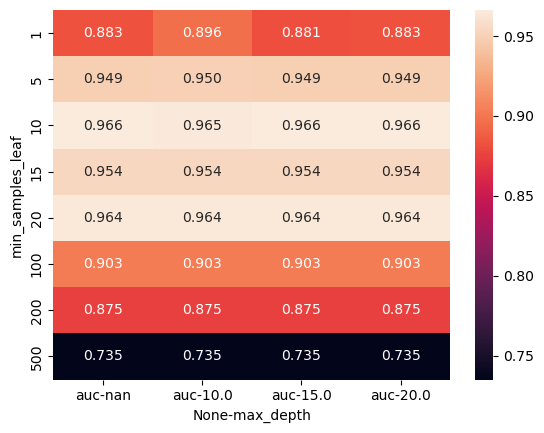

In [20]:
sns.heatmap(df_scores_pivot, annot=True, fmt=".3f")

**It's very important to set a seed/random_state with tree based models. Otherwise the score will be different each run**

In [21]:
dt = DecisionTreeClassifier(class_weight='balanced', max_depth=6, min_samples_leaf=10, random_state=1)
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=6,
                       min_samples_leaf=10, random_state=1)

In [22]:
y_pred = dt.predict_proba(X_val)
roc_auc_score(y_val, y_pred, multi_class='ovr').round(3)

0.969

In [23]:
# Assuming dt is your decision tree model and X_train is a DataFrame
feature_names = X_train.columns.tolist()

# Generate the tree rules
tree_rules = export_text(dt, feature_names=feature_names)

# Replace class labels with meaningful names
tree_rules = tree_rules.replace("class: 1", "class: healthy") \
                       .replace("class: 2", "class: suspicious") \
                       .replace("class: 3", "class: unhealthy")

# Print the modified tree rules
print(tree_rules)

|--- histogram_mean <= 107.50
|   |--- histogram_min <= 67.50
|   |   |--- accelerations <= 0.00
|   |   |   |--- class: unhealthy
|   |   |--- accelerations >  0.00
|   |   |   |--- class: unhealthy
|   |--- histogram_min >  67.50
|   |   |--- class: unhealthy
|--- histogram_mean >  107.50
|   |--- mean_value_of_short_term_variability <= 0.65
|   |   |--- percentage_of_time_with_abnormal_long_term_variability <= 68.50
|   |   |   |--- abnormal_short_term_variability <= 79.50
|   |   |   |   |--- abnormal_short_term_variability <= 58.50
|   |   |   |   |   |--- histogram_min <= 139.50
|   |   |   |   |   |   |--- class: healthy
|   |   |   |   |   |--- histogram_min >  139.50
|   |   |   |   |   |   |--- class: suspicious
|   |   |   |   |--- abnormal_short_term_variability >  58.50
|   |   |   |   |   |--- percentage_of_time_with_abnormal_long_term_variability <= 5.50
|   |   |   |   |   |   |--- class: suspicious
|   |   |   |   |   |--- percentage_of_time_with_abnormal_long_term_var

## Random forest

In [24]:
scores = []

for n in range(10, 201, 10):
    rf = RandomForestClassifier(class_weight='balanced', n_estimators=n, random_state=1)
    rf.fit(X_train, y_train)

    y_pred = rf.predict_proba(X_val)
    auc = roc_auc_score(y_val, y_pred, multi_class='ovr')
    
    scores.append((n, auc))

In [25]:
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'auc'])

**Best value for n_estimators is 50. Let's zoom in into the next plot to see the AUC**

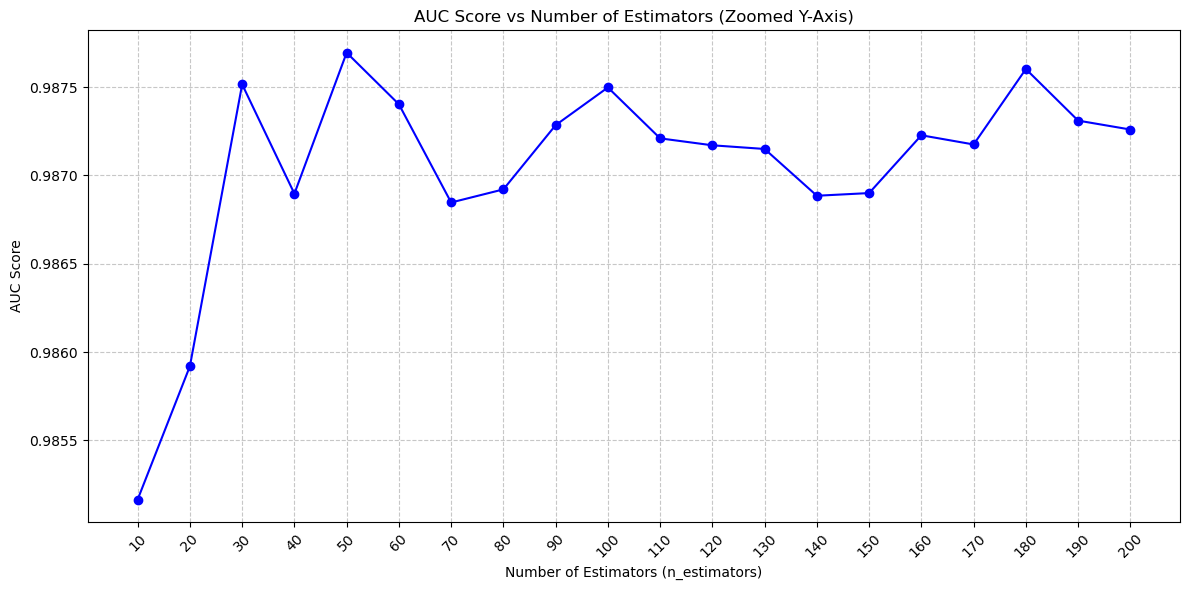

In [26]:
# Increase the figure size (width, height)
plt.figure(figsize=(12, 6))  # Adjust width (12) and height (6) as needed

# Plot the data, add marker o
plt.plot(df_scores.n_estimators, df_scores.auc, marker='o', linestyle='-', color='blue')

# Add more bins (ticks) on the x-axis
plt.xticks(range(10, 201, 10))  # Set ticks at intervals of 10

# Add more bins (ticks) on the x-axis
#plt.yticks([0.985, 0.986, 0.987, 0.988])  # Set ticks at intervals of 0.001

# Rotate x-axis labels
plt.xticks(rotation=45)

# Add a grid
plt.grid(True, linestyle='--', alpha=0.7)

# Zoom in on the y-axis
#plt.ylim(0.985, 0.988)  # Set y-axis limits to focus on a specific range

# Add axis labels and title
plt.xlabel('Number of Estimators (n_estimators)')
plt.ylabel('AUC Score')
plt.title('AUC Score vs Number of Estimators (Zoomed Y-Axis)')

# Adjust padding
plt.tight_layout()

# Display the plot, not needed for Jupyter notebooks but it's good practice
plt.show()

**Best value for n_estimators is 50 with a AUC score of 0.9877**

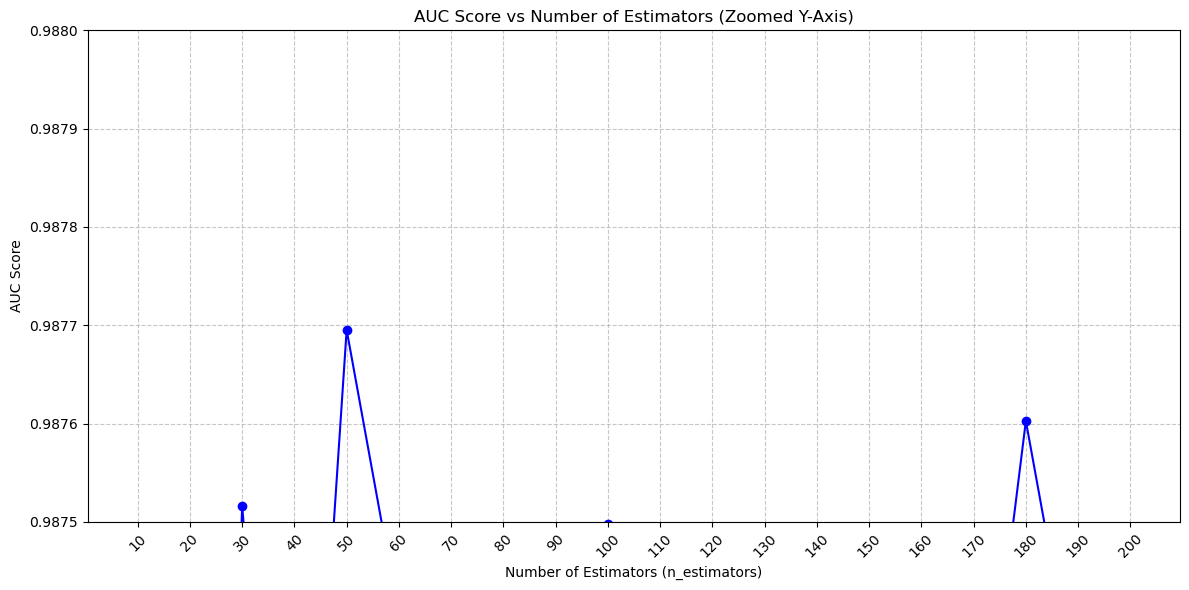

In [27]:
# Increase the figure size (width, height)
plt.figure(figsize=(12, 6))  # Adjust width (12) and height (6) as needed

# Plot the data, add marker o
plt.plot(df_scores.n_estimators, df_scores.auc, marker='o', linestyle='-', color='blue')

# Add more bins (ticks) on the x-axis
plt.xticks(range(10, 201, 10))  # Set ticks at intervals of 10

# Set y-axis ticks at intervals of 0.001
#plt.yticks(np.arange(0.970, 0.984, 0.001)) 

# Rotate x-axis labels
plt.xticks(rotation=45)

# Add a grid
plt.grid(True, linestyle='--', alpha=0.7)

# Zoom in on the y-axis
plt.ylim(0.9875, 0.9880)  # Set y-axis limits to focus on a specific range

# Add axis labels and title
plt.xlabel('Number of Estimators (n_estimators)')
plt.ylabel('AUC Score')
plt.title('AUC Score vs Number of Estimators (Zoomed Y-Axis)')

# Adjust padding
plt.tight_layout()

# Display the plot, not needed for Jupyter notebooks but it's good practice
plt.show()

In [28]:
scores = []

for d in [5, 10, 15]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(class_weight='balanced', 
                                    n_estimators=n,
                                    max_depth=d,
                                    random_state=1)
        rf.fit(X_train, y_train)
    
        y_pred = rf.predict_proba(X_val)
        auc = roc_auc_score(y_val, y_pred, multi_class='ovr')
        
        scores.append((d, n, auc))

In [29]:
columns = ['max_depth', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

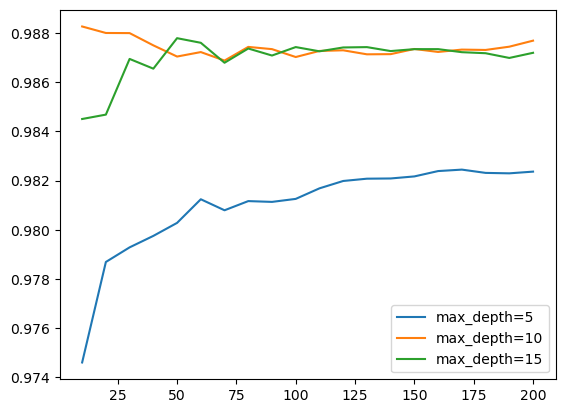

In [30]:
for d in [5, 10, 15]:
    df_subset = df_scores[df_scores.max_depth == d]
    
    plt.plot(df_subset.n_estimators, df_subset.auc,
             label='max_depth=%d' % d)

plt.legend()

In [31]:
max_depth = 10

In [32]:
scores = []

for s in [1, 3, 5, 10, 50]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=max_depth,
                                    min_samples_leaf=s,
                                    random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)
        auc = roc_auc_score(y_val, y_pred, multi_class='ovr')
        scores.append((s, n, auc))

In [33]:
columns = ['min_samples_leaf', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

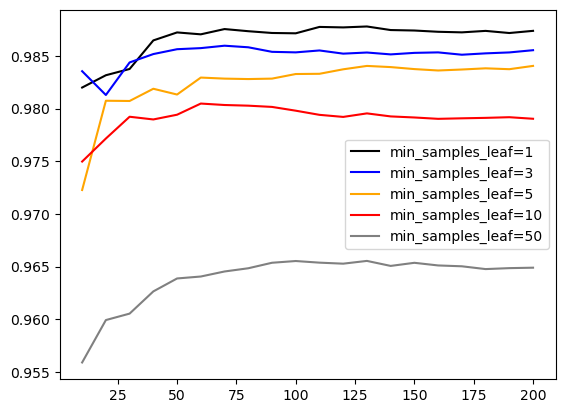

In [34]:
colors = ['black', 'blue', 'orange', 'red', 'grey']
values = [1, 3, 5, 10, 50]

for s, col in zip(values, colors):
    df_subset = df_scores[df_scores.min_samples_leaf == s]
    
    plt.plot(df_subset.n_estimators, df_subset.auc,
             color=col,
             label='min_samples_leaf=%d' % s)

plt.legend()

**We will use min_samples_leaf 1, max_depth 10 and n_estimators 50**

### Final Random Forrest Model

In [35]:
rf = RandomForestClassifier(n_estimators=50,
                            max_depth=10,
                            min_samples_leaf=1,
                            random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=50, random_state=1)

In [36]:
y_pred = rf.predict_proba(X_val)
roc_auc_score(y_val, y_pred, multi_class='ovr')

0.9872377421169606

In [37]:
importances = rf.feature_importances_
print(pd.Series(importances, index=X_train.columns).sort_values(ascending=False))

abnormal_short_term_variability                           0.154365
mean_value_of_short_term_variability                      0.127892
percentage_of_time_with_abnormal_long_term_variability    0.102211
histogram_mean                                            0.091105
histogram_mode                                            0.069245
prolongued_decelerations                                  0.053713
histogram_median                                          0.046995
accelerations                                             0.044607
baseline value                                            0.043701
histogram_variance                                        0.040666
uterine_contractions                                      0.037928
mean_value_of_long_term_variability                       0.036959
histogram_width                                           0.034727
histogram_min                                             0.029995
histogram_max                                             0.02

In [38]:
train_auc = roc_auc_score(y_train, rf.predict_proba(X_train), multi_class='ovr')
val_auc = roc_auc_score(y_val, rf.predict_proba(X_val), multi_class='ovr')
print(f"Training AUC: {train_auc}, Validation AUC: {val_auc}")

Training AUC: 0.9999390247208163, Validation AUC: 0.9872377421169606


**It seems it overfits**

**Let's look at XGBoost model**

## XGBoost model - gradient boosting

**Should be best as this is tabular data but let's not jump to conclusions**

In [39]:
features = X_train.columns.tolist()
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)
display(dtrain)
display(dval)

In [40]:
num_classes = len(np.unique(y_train))
display(f"number of classes: {num_classes}")
display(np.unique(y_train))

'number of classes: 3'

array([1, 2, 3])

**For XGBoost classes need to be zero indexed and we have 1, 2, 3 signifying health values**

In [41]:
print('Shape of X_train:', X_train.shape)
print('Shape of y_train:', y_train.shape)
print('Shape of X_val:', X_val.shape)
print('Shape of y_val:', y_val.shape)

Shape of X_train: (1275, 21)
Shape of y_train: (1275,)
Shape of X_val: (425, 21)
Shape of y_val: (425,)


In [42]:
# Ensure the labels are zero-indexed
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_val = label_encoder.transform(y_val)  # Same transformation for validation set

print('Unique values in y_train:', np.unique(y_train))
print('Unique values in y_val:', np.unique(y_val))

Unique values in y_train: [0 1 2]
Unique values in y_val: [0 1 2]


In [43]:
# Proceed with creating DMatrix
features = X_train.columns.tolist()
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

# Define parameters
xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,
    'objective': 'multi:softprob',
    'num_class': 3,
    'nthread': -1,
    'seed': 1,
    'verbosity': 1,
}

# Train the model
model = xgb.train(xgb_params, dtrain, num_boost_round=10)

In [44]:
y_pred = model.predict(dval)

In [45]:
roc_auc_score(y_val, y_pred, multi_class='ovr')

0.9855096222011522

In [46]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [47]:
%%capture output

xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,
    'objective': 'multi:softprob',
    'num_class': 3,
    'eval_metric': 'auc',
    'nthread': -1,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [48]:
s = output.stdout
print(s)

[0]	train-auc:0.98966	val-auc:0.96605
[5]	train-auc:0.99892	val-auc:0.97516
[10]	train-auc:0.99990	val-auc:0.98407
[15]	train-auc:0.99999	val-auc:0.98670
[20]	train-auc:1.00000	val-auc:0.98773
[25]	train-auc:1.00000	val-auc:0.98750
[30]	train-auc:1.00000	val-auc:0.98715
[35]	train-auc:1.00000	val-auc:0.98742
[40]	train-auc:1.00000	val-auc:0.98663
[45]	train-auc:1.00000	val-auc:0.98636
[50]	train-auc:1.00000	val-auc:0.98628
[55]	train-auc:1.00000	val-auc:0.98622
[60]	train-auc:1.00000	val-auc:0.98613
[65]	train-auc:1.00000	val-auc:0.98627
[70]	train-auc:1.00000	val-auc:0.98611
[75]	train-auc:1.00000	val-auc:0.98606
[80]	train-auc:1.00000	val-auc:0.98583
[85]	train-auc:1.00000	val-auc:0.98581
[90]	train-auc:1.00000	val-auc:0.98567
[95]	train-auc:1.00000	val-auc:0.98567
[100]	train-auc:1.00000	val-auc:0.98549
[105]	train-auc:1.00000	val-auc:0.98533
[110]	train-auc:1.00000	val-auc:0.98524
[115]	train-auc:1.00000	val-auc:0.98540
[120]	train-auc:1.00000	val-auc:0.98527
[125]	train-auc:1.0000

In [49]:
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))
    
    columns = ['num_iter', 'train_auc', 'val_auc']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [50]:
df_score = parse_xgb_output(output)

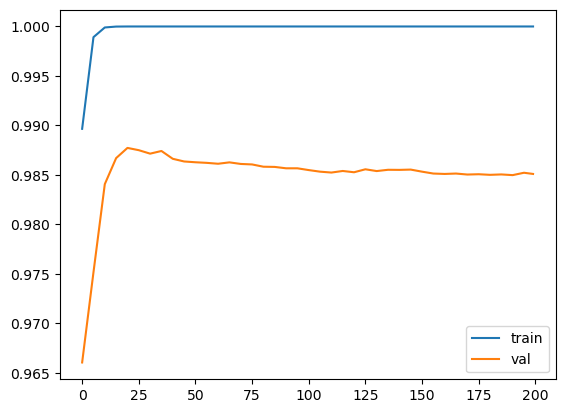

In [51]:
plt.plot(df_score.num_iter, df_score.train_auc, label='train')
plt.plot(df_score.num_iter, df_score.val_auc, label='val')
plt.legend()

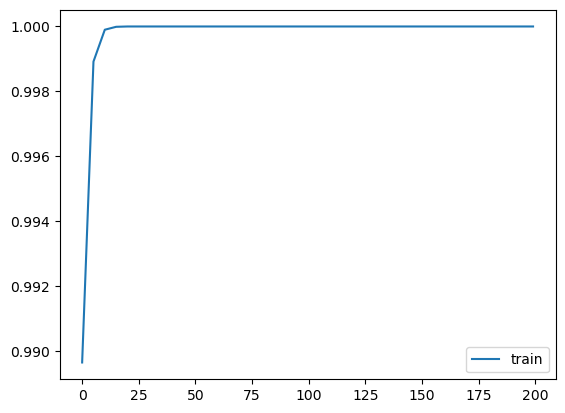

In [52]:
plt.plot(df_score.num_iter, df_score.train_auc, label='train')
#plt.plot(df_score.num_iter, df_score.val_auc, label='val')
plt.legend()

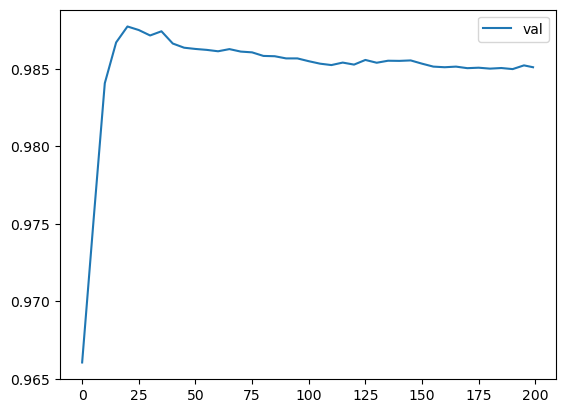

In [53]:
#plt.plot(df_score.num_iter, df_score.train_auc, label='train')
plt.plot(df_score.num_iter, df_score.val_auc, label='val')
plt.legend()

In [54]:
y_pred = model.predict(dval)

In [55]:
roc_auc_score(y_val, y_pred, multi_class='ovr')

0.9864455283749693

### XGBoost parameter tuning

**We will tune: `eta`, `max_depth` and `min_child_weight` parameters**
                

**ETA**

In [56]:
from io import StringIO
import sys

In [57]:
def parse_xgb_output(output):
    results = []

    for line in output.strip().split('\n'):
        parts = line.split('\t')

        if len(parts) >= 3:
            it_line, train_line, val_line = parts[0], parts[1], parts[2]
            it = int(it_line.strip('[]'))
            train = float(train_line.split(':')[1])
            val = float(val_line.split(':')[1])
            results.append((it, train, val))

    columns = ['num_iter', 'train_auc', 'val_auc']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [58]:
etas = [0.01, 0.05, 0.1, 0.3, 1.0]
eta_scores = {}

for eta in etas:
    xgb_params = {
        'eta': eta,
        'max_depth': 6,
        'min_child_weight': 1,
        'objective': 'multi:softprob',
        'num_class': 3,
        'eval_metric': 'auc',
        'nthread': -1,
        'seed': 1,
        'verbosity': 1,
    }

    # Redirect stdout to a StringIO object
    old_stdout = sys.stdout
    sys.stdout = StringIO()

    try:
        # Train model and capture output
        model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                          verbose_eval=5,
                          evals=watchlist)

        # Capture the output from StringIO
        captured_output = sys.stdout.getvalue()

    finally:
        # Reset stdout to its original value
        sys.stdout = old_stdout

    # Parse and store the output
    key = f'eta={eta}'
    eta_scores[key] = parse_xgb_output(captured_output)
'''
# Print or inspect the scores
for key, df in eta_scores.items():
    print(f"Results for {key}:")
    print(df)
'''

'\n# Print or inspect the scores\nfor key, df in eta_scores.items():\n    print(f"Results for {key}:")\n    print(df)\n'

In [59]:
eta_scores.keys()

dict_keys(['eta=0.01', 'eta=0.05', 'eta=0.1', 'eta=0.3', 'eta=1.0'])

**ETA 0.1, 0.05 and 0.3 are neck and neck. ETA 0.3 starts strong early but the AUC declines. <br>
ETA 0.1 needs to reach num_boost_round 100 and then is almost stable while <br>
ETA 0.05 has the best AUC but it reaches it at 180 - 200 num_boost_round. <br>
<br>
If this was in a production environment we would save the performance cost and go with 0.3. <br>
But since this is a personal project on a small dataset we will choose 0.05 for maximum performance.**

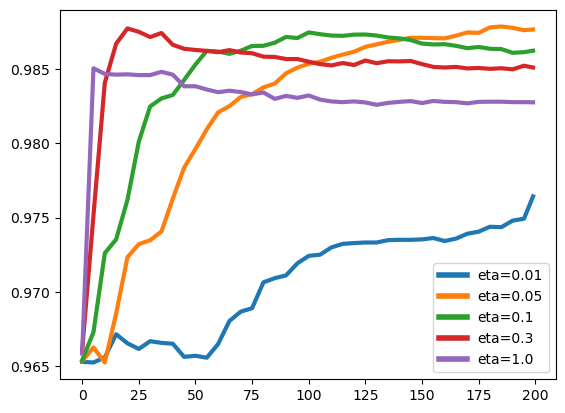

In [60]:
for key, df_score in eta_scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=key, linewidth=3)
# Create the legend
legend = plt.legend()

# Make the legend lines thicker
for line in legend.get_lines():
    line.set_linewidth(4)  # Adjust the line width as needed

**MAX_DEPTH**

In [61]:
max_depths = [3, 4, 6, 10]
max_depth_scores = {}

for depth in max_depths:
    xgb_params = {
        'eta': 0.05,
        'max_depth': depth,
        'min_child_weight': 1,
        'objective': 'multi:softprob',
        'num_class': 3,
        'eval_metric': 'auc',
        'nthread': -1,
        'seed': 1,
        'verbosity': 1,
    }

    # Redirect stdout to a StringIO object
    old_stdout = sys.stdout
    sys.stdout = StringIO()

    try:
        # Train model and capture output
        model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                          verbose_eval=5,
                          evals=watchlist)

        # Capture the output from StringIO
        captured_output = sys.stdout.getvalue()

    finally:
        # Reset stdout to its original value
        sys.stdout = old_stdout

    # Parse and store the output
    key = f'max_depth={depth}'
    max_depth_scores[key] = parse_xgb_output(captured_output)

In [62]:
max_depth_scores.keys()

dict_keys(['max_depth=3', 'max_depth=4', 'max_depth=6', 'max_depth=10'])

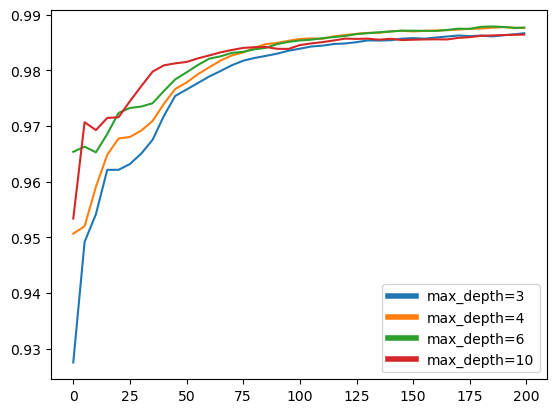

In [63]:
for key, df_score in max_depth_scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=key)
# Create the legend
legend = plt.legend()

# Make the legend lines thicker
for line in legend.get_lines():
    line.set_linewidth(4)  # Adjust the line width as needed

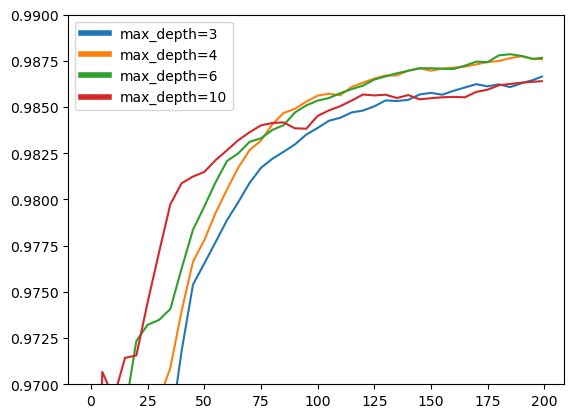

In [64]:
for key, df_score in max_depth_scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=key)
plt.ylim(0.97, 0.99)
# Create the legend
legend = plt.legend()

# Make the legend lines thicker
for line in legend.get_lines():
    line.set_linewidth(4)  # Adjust the line width as needed

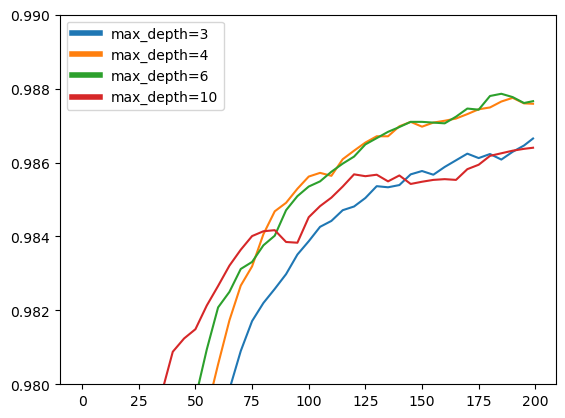

In [65]:
for key, df_score in max_depth_scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=key)
plt.ylim(0.98, 0.99)
# Create the legend
legend = plt.legend()

# Make the legend lines thicker
for line in legend.get_lines():
    line.set_linewidth(4)  # Adjust the line width as needed

**We will use max_depth 6**

**MIN_CHILD_WEIGHT**

In [66]:
min_child_weights = [1, 10, 30]
min_child_weight_scores = {}

for weight in min_child_weights:
    xgb_params = {
        'eta': 0.05,
        'max_depth': 6,
        'min_child_weight': weight,
        'objective': 'multi:softprob',
        'num_class': 3,
        'eval_metric': 'auc',
        'nthread': -1,
        'seed': 1,
        'verbosity': 1,
    }

    # Redirect stdout to a StringIO object
    old_stdout = sys.stdout
    sys.stdout = StringIO()

    try:
        # Train model and capture output
        model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                          verbose_eval=5,
                          evals=watchlist)

        # Capture the output from StringIO
        captured_output = sys.stdout.getvalue()

    finally:
        # Reset stdout to its original value
        sys.stdout = old_stdout

    # Parse and store the output
    key = f'min_child_weight={weight}'
    min_child_weight_scores[key] = parse_xgb_output(captured_output)

In [67]:
min_child_weight_scores.keys()

dict_keys(['min_child_weight=1', 'min_child_weight=10', 'min_child_weight=30'])

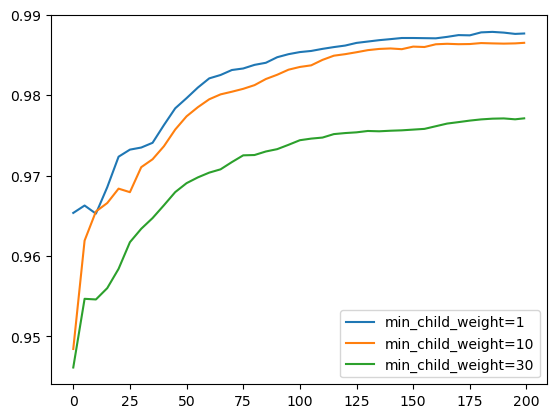

In [68]:
for key, df_score in min_child_weight_scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=key)
# Add more ticks on the y-axis
plt.yticks(np.arange(0.95, 0.99, 0.01))  # Adjust the range and step size
plt.legend()

**min_child_weight 1 is best**

### Final XGBoost model

**Parameters: `eta` 0.05 `max_depth` 6, `min_child_weight` 1 

In [69]:
# Proceed with creating DMatrix
features = X_train.columns.tolist()
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

# Define parameters
xgb_params = {
    'eta': 0.05,
    'max_depth': 6,
    'min_child_weight': 1,
    'objective': 'multi:softprob',
    'num_class': 3,
    'nthread': -1,
    'seed': 1,
    'verbosity': 1,
}

# Train the model
model = xgb.train(xgb_params, dtrain, num_boost_round=200)

In [70]:
y_pred = model.predict(dval)

In [71]:
roc_auc_score(y_val, y_pred, multi_class='ovr')

0.9890640651760071

**There is a possiblility of overfitting lets check it out**

In [72]:
# Calculate class weights
class_counts = np.bincount(y_train)  # Count of each class in the training set
total_samples = len(y_train)
class_weights = total_samples / (len(class_counts) * class_counts)  # Inverse of class frequencies

# Normalize weights (optional but recommended)
class_weights = class_weights / class_weights.sum()

# Map weights to each sample
sample_weights = np.array([class_weights[class_id] for class_id in y_train])

In [73]:
# Create DMatrix with sample weights
dtrain = xgb.DMatrix(X_train, label=y_train, weight=sample_weights, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [74]:
# Define parameters
xgb_params = {
    'eta': 0.05,
    'max_depth': 6,
    'min_child_weight': 1,
    'objective': 'multi:softprob',
    'num_class': 3,  # Number of classes
    'nthread': -1,
    'seed': 1,
    'verbosity': 1,
}

# Train the model
model = xgb.train(xgb_params, dtrain, num_boost_round=200)

In [75]:
# Predict on the validation set
y_val_pred = model.predict(dval)
y_val_pred = np.argmax(y_val_pred, axis=1)  # Convert probabilities to class labels

# Print classification report
print(classification_report(y_val, y_val_pred))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96       329
           1       0.75      0.88      0.81        58
           2       0.88      0.97      0.93        38

    accuracy                           0.94       425
   macro avg       0.87      0.93      0.90       425
weighted avg       0.94      0.94      0.94       425



In [76]:
# Convert X_train to DMatrix
dtrain = xgb.DMatrix(X_train, label=y_train)

# Predict on the training set
y_train_pred = model.predict(dtrain)
y_train_pred = np.argmax(y_train_pred, axis=1)  # Convert probabilities to class labels

# Generate classification report for training set
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99      1000
           1       0.89      1.00      0.94       169
           2       0.93      1.00      0.96       106

    accuracy                           0.98      1275
   macro avg       0.94      0.99      0.96      1275
weighted avg       0.98      0.98      0.98      1275



In [77]:
y_pred = model.predict(dval)
roc_auc_score(y_val, y_pred, multi_class='ovr')

0.9876331972112459

**The model is overfitting. Lets reduce the tree depth. And increase min_child_weight. This is a small dataset and it turns out we tuned it too much and it remembered all possible combinations and lost the ability to generalize**

In [78]:
# Calculate class weights
class_counts = np.bincount(y_train)  # Count of each class in the training set
total_samples = len(y_train)
class_weights = total_samples / (len(class_counts) * class_counts)  # Inverse of class frequencies

# Normalize weights (optional but recommended)
class_weights = class_weights / class_weights.sum()

# Map weights to each sample
sample_weights = np.array([class_weights[class_id] for class_id in y_train])

# Create DMatrix with sample weights
dtrain = xgb.DMatrix(X_train, label=y_train, weight=sample_weights, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

# Define parameters
xgb_params = {
    'eta': 0.05,
    'max_depth': 3,
    'min_child_weight': 5,
    'objective': 'multi:softprob',
    'num_class': 3,  # Number of classes
    'nthread': -1,
    'seed': 1,
    'verbosity': 1,
}

# Train the model
model = xgb.train(xgb_params, dtrain, num_boost_round=200)

**Lets test the validation dataset**

In [79]:
# Predict on the validation set
y_val_pred = model.predict(dval)
y_val_pred = np.argmax(y_val_pred, axis=1)  # Convert probabilities to class labels

# Print classification report
print(classification_report(y_val, y_val_pred))

              precision    recall  f1-score   support

           0       0.98      0.90      0.94       329
           1       0.65      0.90      0.75        58
           2       0.82      0.95      0.88        38

    accuracy                           0.90       425
   macro avg       0.82      0.91      0.86       425
weighted avg       0.92      0.90      0.91       425



**And train dataset**

In [80]:
# Convert X_train to DMatrix
dtrain = xgb.DMatrix(X_train, label=y_train)

# Predict on the training set
y_train_pred = model.predict(dtrain)
y_train_pred = np.argmax(y_train_pred, axis=1)  # Convert probabilities to class labels

# Generate classification report for training set
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.99      0.92      0.95      1000
           1       0.72      0.94      0.81       169
           2       0.86      0.99      0.92       106

    accuracy                           0.93      1275
   macro avg       0.86      0.95      0.90      1275
weighted avg       0.94      0.93      0.93      1275



In [81]:
y_pred = model.predict(dval)
roc_auc_score(y_val, y_pred, multi_class='ovr')

0.9809715861047992

**It seems xgboost model keeps overfitting**

### We will use a Decision Tree with max_depth 6 and min_samples_leaf 10

In [82]:
dt = DecisionTreeClassifier(
    class_weight='balanced', 
    max_depth=6, 
    min_samples_leaf=10, 
    random_state=1)
dt.fit(X_train, y_train)

y_pred = dt.predict_proba(X_val)
auc = roc_auc_score(y_val, y_pred, multi_class='ovr')
auc

0.9694133692985414

In [83]:
# Generate class predictions
y_pred_class = dt.predict(X_val)

# Generate classification report
report = classification_report(y_val, y_pred_class)
print(report)


              precision    recall  f1-score   support

           0       0.98      0.89      0.93       329
           1       0.68      0.90      0.77        58
           2       0.77      0.97      0.86        38

    accuracy                           0.90       425
   macro avg       0.81      0.92      0.86       425
weighted avg       0.92      0.90      0.91       425



## Selecting the model

In [84]:
X_train.iloc[0]

baseline value                                            125.000
accelerations                                               0.000
fetal_movement                                              0.000
uterine_contractions                                        0.004
light_decelerations                                         0.000
severe_decelerations                                        0.000
prolongued_decelerations                                    0.000
abnormal_short_term_variability                            38.000
mean_value_of_short_term_variability                        0.800
percentage_of_time_with_abnormal_long_term_variability     11.000
mean_value_of_long_term_variability                         9.000
histogram_width                                            35.000
histogram_min                                             103.000
histogram_max                                             138.000
histogram_number_of_peaks                                   2.000
histogram_

In [85]:
# Predict the class for X_train_reduced[0]
predicted_class = dt.predict([X_train.iloc[0]])

print("Predicted class:", predicted_class[0])

Predicted class: 0


/home/ikar/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [86]:
# Get the predicted probabilities for X_train_reduced[0]
predicted_probabilities = dt.predict_proba([X_train.iloc[0]])

print("Predicted probabilities:", predicted_probabilities[0])

Predicted probabilities: [0.98225298 0.01774702 0.        ]


/home/ikar/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [87]:
df.iloc[0].to_dict()

{'baseline value': 120.0,
 'accelerations': 0.0,
 'fetal_movement': 0.0,
 'uterine_contractions': 0.0,
 'light_decelerations': 0.0,
 'severe_decelerations': 0.0,
 'prolongued_decelerations': 0.0,
 'abnormal_short_term_variability': 73.0,
 'mean_value_of_short_term_variability': 0.5,
 'percentage_of_time_with_abnormal_long_term_variability': 43.0,
 'mean_value_of_long_term_variability': 2.4,
 'histogram_width': 64.0,
 'histogram_min': 62.0,
 'histogram_max': 126.0,
 'histogram_number_of_peaks': 2.0,
 'histogram_number_of_zeroes': 0.0,
 'histogram_mode': 120.0,
 'histogram_mean': 137.0,
 'histogram_median': 121.0,
 'histogram_variance': 73.0,
 'histogram_tendency': 1.0,
 'fetal_health': 2.0}

In [88]:
print("Unique classes in training:", dt.classes_)

Unique classes in training: [0 1 2]


In [89]:
max_values = df.max()
min_values = df.min()

display(min_values)
display(max_values)

baseline value                                            106.0
accelerations                                               0.0
fetal_movement                                              0.0
uterine_contractions                                        0.0
light_decelerations                                         0.0
severe_decelerations                                        0.0
prolongued_decelerations                                    0.0
abnormal_short_term_variability                            12.0
mean_value_of_short_term_variability                        0.2
percentage_of_time_with_abnormal_long_term_variability      0.0
mean_value_of_long_term_variability                         0.0
histogram_width                                             3.0
histogram_min                                              50.0
histogram_max                                             122.0
histogram_number_of_peaks                                   0.0
histogram_number_of_zeroes              

baseline value                                            160.000
accelerations                                               0.019
fetal_movement                                              0.481
uterine_contractions                                        0.015
light_decelerations                                         0.015
severe_decelerations                                        0.001
prolongued_decelerations                                    0.005
abnormal_short_term_variability                            87.000
mean_value_of_short_term_variability                        7.000
percentage_of_time_with_abnormal_long_term_variability     91.000
mean_value_of_long_term_variability                        50.700
histogram_width                                           180.000
histogram_min                                             159.000
histogram_max                                             238.000
histogram_number_of_peaks                                  18.000
histogram_